In [1]:
import numpy as np
import pandas as pd
#import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_file = "~/Documents/python/project02/amazon_musical_instru_star_rev_only.tsv"
col_list = ["star_rating","review_body"]
#reviews_df = pd.read_csv(data_file, sep="\t", usecols=col_list, low_memory=False)
reviews_df = pd.read_csv(data_file, sep="\t", usecols=col_list, nrows=20000)

In [3]:
reviews_df['star_rating'] = reviews_df['star_rating'].fillna(0)
reviews_df['review_body'] = reviews_df['review_body'].fillna('')

In [ ]:
reviews_df.head(15)

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   star_rating  20000 non-null  int64 
 1   review_body  20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [ ]:
reviews_df.tail(10)

In [5]:
# stats on the star rating for the 20,000 records
print("Min star:", reviews_df['star_rating'].min())
print("Max star:", reviews_df['star_rating'].max())
print("Average star:", reviews_df['star_rating'].mean())
print("Median star:", reviews_df['star_rating'].median())

Min star: 1
Max star: 5
Average star: 4.28765
Median star: 5.0


In [6]:
def count_words(data):
    return len(data.split())

In [7]:
def count_excla(data):
    return data.count("!")

In [8]:
def count_ques(data):
    return data.count("?")

In [9]:
# removes special characters are some "<br />" and returns list of words
def remove_special_chars(data):
    word_list = []
    cleaned_list = []
    alphanum = ""
    data = data.replace("<br />"," ") #replace <br /> text in some reviews with space
    word_list = data.lower().split()
    
    for word in word_list:
        alphanum = [character for character in word if character.isalnum()]
        alphanum = "".join(alphanum)
        cleaned_list.append(alphanum)
        
    cleaned_list = list(filter(None, cleaned_list)) #remove Null values
    
    return cleaned_list

In [10]:
# returns a dictionary with the word and number of occurances
def get_uniq_words(data):
    word_counter = {}
    for word in data:
        word_counter[word] = word_counter.get(word, 0) + 1
        
    return(word_counter)

In [11]:
def count_excla_review(data):
    return data[data['num_exclamations_marks'] != 0].count()

In [12]:
def count_ques_review(data):
    return data[data['num_questions_marks'] != 0].count()

In [15]:
def calc_percent(numer, denom):
    return int((numer/denom)*100)

In [23]:
# Count number of words for each review and add a column to the dataframe
word_count = []
excla_count = []
ques_count = []
for index, row in reviews_df.iterrows():
    word_count.append(count_words(reviews_df.iloc[index]['review_body']))
    excla_count.append(count_excla(reviews_df.iloc[index]['review_body']))
    ques_count.append(count_ques(reviews_df.iloc[index]['review_body']))
    
reviews_df["num_of_words"] = word_count
reviews_df["num_exclamations_marks"] = excla_count
reviews_df["num_questions_marks"]= ques_count

In [24]:
# Stats on Word Count for all reviews
print("Stats on word count for all reviews")
print("-----------------------------------")
print("Min number of words:", reviews_df['num_of_words'].min())
print("Max number of words:", reviews_df['num_of_words'].max())
print("Average number of words:", reviews_df['num_of_words'].mean())
print("Median number of words:", reviews_df['num_of_words'].median())

Stats on word count for all reviews
-----------------------------------
Min number of words: 0
Max number of words: 2163
Average number of words: 41.6003
Median number of words: 17.0


In [25]:
# Stats on number of exclamation and question marks for all reviews
print("Stats on exclamation marks for all reviews")
print("-----------------------------------")
print("Min number of exclamation marks:", reviews_df['num_exclamations_marks'].min())
print("Max number of exclamation marks:", reviews_df['num_exclamations_marks'].max())
print("Average number of exclamation marks:", reviews_df['num_exclamations_marks'].mean())
print("Median number of exclamation marks:", reviews_df['num_exclamations_marks'].median())
print('\n')
print("Stats on question marks for all reviews")
print("-----------------------------------")
print("Min number of question marks:", reviews_df['num_questions_marks'].min())
print("Max number of question marks:", reviews_df['num_questions_marks'].max())
print("Average number of question marks:", reviews_df['num_questions_marks'].mean())
print("Median number of question marks:", reviews_df['num_questions_marks'].median())

Stats on exclamation marks for all reviews
-----------------------------------
Min number of exclamation marks: 0
Max number of exclamation marks: 54
Average number of exclamation marks: 0.4231
Median number of exclamation marks: 0.0


Stats on question marks for all reviews
-----------------------------------
Min number of question marks: 0
Max number of question marks: 13
Average number of question marks: 0.0337
Median number of question marks: 0.0


In [26]:
# number of reviews for each star rating
reviews_df.groupby(['star_rating']).count()

,review_body,num_of_words,num_exclamations_marks,num_questions_marks
star_rating,,,,
1,1482,1482,1482,1482
2,817,817,817,817
3,1402,1402,1402,1402
4,3064,3064,3064,3064
5,13235,13235,13235,13235


In [27]:
# analyzing One Star reviews
onestar_reviews_df = reviews_df[reviews_df['star_rating'] == 1]
onestar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 17 to 19962
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   star_rating             1482 non-null   int64 
 1   review_body             1482 non-null   object
 2   num_of_words            1482 non-null   int64 
 3   num_exclamations_marks  1482 non-null   int64 
 4   num_questions_marks     1482 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 69.5+ KB


In [28]:
# Stats on Word, Exclamation & question mark Count for one star reviews
print("Stats on word, Exclamation & question mark count for 1 Star Reviews")
print("----------------------------------------")
print("Min number of words:", onestar_reviews_df['num_of_words'].min())
print("Max number of words:", onestar_reviews_df['num_of_words'].max())
print("Average number of words:", onestar_reviews_df['num_of_words'].mean())
print("Median number of words:", onestar_reviews_df['num_of_words'].median())
print("Max number of Exclamation Marks:", onestar_reviews_df['num_exclamations_marks'].max())
print("Average number of Exclamation Marks:", onestar_reviews_df['num_exclamations_marks'].mean())
print("Median number of Exclamation Marks:", onestar_reviews_df['num_exclamations_marks'].median())
print("Max number of Question Marks:", onestar_reviews_df['num_questions_marks'].max())
print("Average number of Question Marks:", onestar_reviews_df['num_questions_marks'].mean())
print("Median number of Question Marks:", onestar_reviews_df['num_questions_marks'].median())

Stats on word, Exclamation & question mark count for 1 Star Reviews
----------------------------------------
Min number of words: 0
Max number of words: 1477
Average number of words: 44.152496626180834
Median number of words: 25.0
Max number of Exclamation Marks: 14
Average number of Exclamation Marks: 0.4149797570850202
Median number of Exclamation Marks: 0.0
Max number of Question Marks: 5
Average number of Question Marks: 0.0620782726045884
Median number of Question Marks: 0.0


In [ ]:
# may not be required
del onestar_reviews_df['num_of_words']
onestar_reviews_df.info()

In [17]:
# filtering only reviews with exclamation or question marks
onestar_filtered_df = onestar_reviews_df.drop(onestar_reviews_df[(onestar_reviews_df['num_exclamations_marks'] == 0) & (onestar_reviews_df['num_questions_marks'] == 0)].index)
onestar_filtered_df.head()

,star_rating,review_body,num_of_words,num_exclamations_marks,num_questions_marks
558,1,These just arrived in the mail today and I was...,102,2,0
575,1,Made too cheap !,4,1,0
585,1,Doesn't fit blue yeti!!!!,4,4,0
614,1,"Strings kept breaking, bad buy!",5,1,0
619,1,The plastic collar for the hook broke without ...,42,1,0


In [21]:
onestar_exclam_count = onestar_filtered_df[onestar_filtered_df['num_exclamations_marks'] != 0].count()
print(onestar_exclam_count['num_exclamations_marks'])

267


In [22]:
onestar_ques_count = onestar_filtered_df[onestar_filtered_df['num_questions_marks'] != 0].count()
print(onestar_ques_count['num_questions_marks'])

60


In [28]:
onestar_filtered_df.tail(30)

,star_rating,review_body,num_of_words,num_exclamations_marks,num_questions_marks
18497,1,Do not buy this piano (the Legato). If you wan...,166,0,1
18529,1,iRig has the worst customer support. The Light...,208,0,1
18538,1,I can't believe how many 5 stars this unnatura...,167,4,0
18623,1,"Received this dolly, went to open it up and th...",93,2,0
18689,1,Broke after about a week of non continuous use...,43,0,1
18692,1,These really suck. Way too thick and don't so...,39,2,0
18768,1,Impossible to put all toghether!!!,5,3,0
18774,1,I purchased this for my wife back in December ...,398,3,0
18870,1,I DONT KNOW why the first chord is so loose an...,24,0,1
18902,1,This light started flickering after only five ...,69,0,1


In [29]:
# analyzing Two Star reviews
twostar_reviews_df = reviews_df[reviews_df['star_rating'] == 2]
twostar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 6 to 19993
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   star_rating             817 non-null    int64 
 1   review_body             817 non-null    object
 2   num_of_words            817 non-null    int64 
 3   num_exclamations_marks  817 non-null    int64 
 4   num_questions_marks     817 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 38.3+ KB


In [30]:
# Stats on Word Count for two star reviews
print("Stats on word, exclamation & question mark count for 2 Star Reviews")
print("---------------------------------------")
print("Min number of words:", twostar_reviews_df['num_of_words'].min())
print("Max number of words:", twostar_reviews_df['num_of_words'].max())
print("Average number of words:", twostar_reviews_df['num_of_words'].mean())
print("Median number of words:", twostar_reviews_df['num_of_words'].median())
print("Max number of exclamation marks:", twostar_reviews_df['num_exclamations_marks'].max())
print("Average number of exclamation marks:", twostar_reviews_df['num_exclamations_marks'].mean())
print("Median number of exclamation marks:", twostar_reviews_df['num_exclamations_marks'].median())
print("Max number of question marks:", twostar_reviews_df['num_questions_marks'].max())
print("Average number of question marks:", twostar_reviews_df['num_questions_marks'].mean())
print("Median number of question marks:", twostar_reviews_df['num_questions_marks'].median())

Stats on word, exclamation & question mark count for 2 Star Reviews
---------------------------------------
Min number of words: 1
Max number of words: 506
Average number of words: 53.840881272949815
Median number of words: 31.0
Max number of exclamation marks: 10
Average number of exclamation marks: 0.189718482252142
Median number of exclamation marks: 0.0
Max number of question marks: 6
Average number of question marks: 0.04895960832313342
Median number of question marks: 0.0


In [31]:
print(count_excla_review(twostar_reviews_df))
print(count_ques_review(twostar_reviews_df))

star_rating               80
review_body               80
num_of_words              80
num_exclamations_marks    80
num_questions_marks       80
dtype: int64
star_rating               28
review_body               28
num_of_words              28
num_exclamations_marks    28
num_questions_marks       28
dtype: int64


In [32]:
# analyzing Three Star reviews
threestar_reviews_df = reviews_df[reviews_df['star_rating'] == 3]
threestar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 19959
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   star_rating             1402 non-null   int64 
 1   review_body             1402 non-null   object
 2   num_of_words            1402 non-null   int64 
 3   num_exclamations_marks  1402 non-null   int64 
 4   num_questions_marks     1402 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 65.7+ KB


In [33]:
# Stats on Word, exclamation & question mark Count for three star reviews
print("Stats on word, exclamation & question mark count for 3 Star Reviews")
print("------------------------------------------")
print("Min number of words:", threestar_reviews_df['num_of_words'].min())
print("Max number of words:", threestar_reviews_df['num_of_words'].max())
print("Average number of words:", threestar_reviews_df['num_of_words'].mean())
print("Median number of words:", threestar_reviews_df['num_of_words'].median())
print("Max number of exclamation marks:", threestar_reviews_df['num_exclamations_marks'].max())
print("Average number of exclamation marks:", threestar_reviews_df['num_exclamations_marks'].mean())
print("Median number of exclamation marks:", threestar_reviews_df['num_exclamations_marks'].median())
print("Max number of questions marks:", threestar_reviews_df['num_questions_marks'].max())
print("Average number of questions marks:", threestar_reviews_df['num_questions_marks'].mean())
print("Median number of questions marks:", threestar_reviews_df['num_questions_marks'].median())

Stats on word, exclamation & question mark count for 3 Star Reviews
------------------------------------------
Min number of words: 1
Max number of words: 1483
Average number of words: 53.55135520684736
Median number of words: 26.0
Max number of exclamation marks: 15
Average number of exclamation marks: 0.1861626248216833
Median number of exclamation marks: 0.0
Max number of questions marks: 6
Average number of questions marks: 0.05420827389443652
Median number of questions marks: 0.0


In [34]:
# analyzing Four Star reviews
fourstar_reviews_df = reviews_df[reviews_df['star_rating'] == 4]
fourstar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3064 entries, 11 to 19998
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   star_rating             3064 non-null   int64 
 1   review_body             3064 non-null   object
 2   num_of_words            3064 non-null   int64 
 3   num_exclamations_marks  3064 non-null   int64 
 4   num_questions_marks     3064 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 143.6+ KB


In [35]:
# Stats on Word, exclamation & question marks Count for 4 star reviews
print("Stats on word, exclamation & question marks count for 4 Star Reviews")
print("-----------------------------------------")
print("Min number of words:", fourstar_reviews_df['num_of_words'].min())
print("Max number of words:", fourstar_reviews_df['num_of_words'].max())
print("Average number of words:", fourstar_reviews_df['num_of_words'].mean())
print("Median number of words:", fourstar_reviews_df['num_of_words'].median())
print("Max number of exclamation marks:", fourstar_reviews_df['num_exclamations_marks'].max())
print("Average number of exclamation marks:", fourstar_reviews_df['num_exclamations_marks'].mean())
print("Median number of exclamation marks:", fourstar_reviews_df['num_exclamations_marks'].median())
print("Max number of question marks:", fourstar_reviews_df['num_questions_marks'].max())
print("Average number of question marks:", fourstar_reviews_df['num_questions_marks'].mean())
print("Median number of question marks:", fourstar_reviews_df['num_questions_marks'].median())

Stats on word, exclamation & question marks count for 4 Star Reviews
-----------------------------------------
Min number of words: 0
Max number of words: 1623
Average number of words: 52.84595300261097
Median number of words: 23.0
Max number of exclamation marks: 15
Average number of exclamation marks: 0.23237597911227154
Median number of exclamation marks: 0.0
Max number of question marks: 6
Average number of question marks: 0.03328981723237598
Median number of question marks: 0.0


In [36]:
# analyzing Five Star reviews
fivestar_reviews_df = reviews_df[reviews_df['star_rating'] == 5]
fivestar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13235 entries, 1 to 19999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   star_rating             13235 non-null  int64 
 1   review_body             13235 non-null  object
 2   num_of_words            13235 non-null  int64 
 3   num_exclamations_marks  13235 non-null  int64 
 4   num_questions_marks     13235 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 620.4+ KB


In [37]:
# Stats on Word, exclamation & question marks Count for five star reviews
print("Stats on word, exclamation & question marks count for 5 Star Reviews")
print("-----------------------------------------")
print("Min number of words:", fivestar_reviews_df['num_of_words'].min())
print("Max number of words:", fivestar_reviews_df['num_of_words'].max())
print("Average number of words:", fivestar_reviews_df['num_of_words'].mean())
print("Median number of words:", fivestar_reviews_df['num_of_words'].median())
print("Max number of exclamation marks:", fivestar_reviews_df['num_exclamations_marks'].max())
print("Average number of exclamation marks:", fivestar_reviews_df['num_exclamations_marks'].mean())
print("Median number of exclamation marks:", fivestar_reviews_df['num_exclamations_marks'].median())
print("Max number of question marks:", fivestar_reviews_df['num_questions_marks'].max())
print("Average number of question marks:", fivestar_reviews_df['num_questions_marks'].mean())
print("Median number of question marks:", fivestar_reviews_df['num_questions_marks'].median())

Stats on word, exclamation & question marks count for 5 Star Reviews
-----------------------------------------
Min number of words: 0
Max number of words: 2163
Average number of words: 36.689459765772575
Median number of words: 13.0
Max number of exclamation marks: 54
Average number of exclamation marks: 0.5076690593124291
Median number of exclamation marks: 0.0
Max number of question marks: 13
Average number of question marks: 0.027502833396297697
Median number of question marks: 0.0


In [40]:
fourstar_reviews_df['star_rating'].count()

3064

In [48]:
# counting number of exclamation and question marks for each star review category
onestar_excla_series = count_excla_review(onestar_reviews_df)
onestar_excla_count_val = calc_percent(onestar_excla_series['num_exclamations_marks'],
                                       onestar_reviews_df['star_rating'].count())
print(onestar_excla_count_val)
onestar_ques_series = count_ques_review(onestar_reviews_df)
onestar_ques_count_val = calc_percent(onestar_ques_series['num_questions_marks'],
                                      onestar_reviews_df['star_rating'].count())
print(onestar_ques_count_val)
twostar_excla_series = count_excla_review(twostar_reviews_df)
twostar_excla_count_val = calc_percent(twostar_excla_series['num_exclamations_marks'],
                                       twostar_reviews_df['star_rating'].count())
print(twostar_excla_count_val)
twostar_ques_series = count_ques_review(twostar_reviews_df)
twostar_ques_count_val = calc_percent(twostar_ques_series['num_questions_marks'],
                                      twostar_reviews_df['star_rating'].count())
print(twostar_ques_count_val)
threestar_excla_series = count_excla_review(threestar_reviews_df)
threestar_excla_count_val = calc_percent(threestar_excla_series['num_exclamations_marks'],
                                         threestar_reviews_df['star_rating'].count())
print(threestar_excla_count_val)
threestar_ques_series = count_ques_review(threestar_reviews_df)
threestar_ques_count_val = calc_percent(threestar_ques_series['num_questions_marks'],
                                        threestar_reviews_df['star_rating'].count())
print(threestar_ques_count_val)
fourstar_excla_series = count_excla_review(fourstar_reviews_df)
fourstar_excla_count_val = calc_percent(fourstar_excla_series['num_exclamations_marks'],
                                        fourstar_reviews_df['star_rating'].count())
print(fourstar_excla_count_val)
fourstar_ques_series = count_ques_review(fourstar_reviews_df)
fourstar_ques_count_val = calc_percent(fourstar_ques_series['num_questions_marks'],
                                       fourstar_reviews_df['star_rating'].count())
print(fourstar_ques_count_val)
fivestar_excla_series = count_excla_review(fivestar_reviews_df)
fivestar_excla_count_val = calc_percent(fivestar_excla_series['num_exclamations_marks'],
                                        fivestar_reviews_df['star_rating'].count())
print(fivestar_excla_count_val)
fivestar_ques_series = count_ques_review(fivestar_reviews_df)
fivestar_ques_count_val = calc_percent(fivestar_ques_series['num_questions_marks'],
                                       fivestar_reviews_df['star_rating'].count())
print(fivestar_ques_count_val)

18
4
9
3
9
3
14
2
27
1


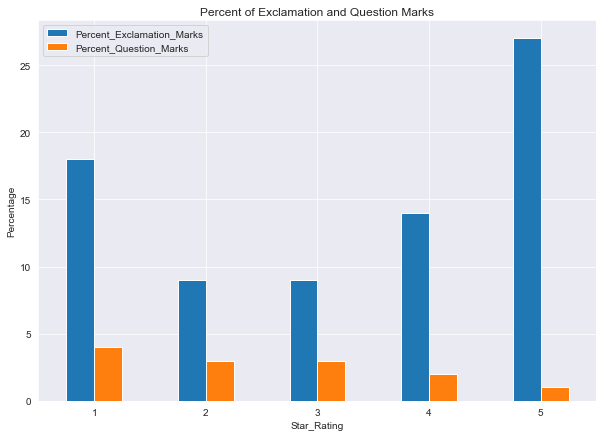

In [70]:
# Plot bar chart comparing eclamation and question marks by review star rating

allstar_e_q_count = {'Star_Rating':[1,2,3,4,5],
                     'Percent_Exclamation_Marks':[onestar_excla_count_val,twostar_excla_count_val,
                                               threestar_excla_count_val,fourstar_excla_count_val,
                                               fivestar_excla_count_val],
                    'Percent_Question_Marks':[onestar_ques_count_val,twostar_ques_count_val,
                                           threestar_ques_count_val,fourstar_ques_count_val,
                                           fivestar_ques_count_val]}

allstar_excla_ques_count_df = pd.DataFrame(allstar_e_q_count)
allstar_excla_ques_count_df = allstar_excla_ques_count_df.set_index('Star_Rating')

#plt.figure(figsize=(10,10))
sns.set_style("dark")
allstar_excla_ques_count_df.plot.bar(title="Percent of Exclamation and Question Marks",
                                    figsize=(10,7), grid=True)
plt.ylabel("Percentage")
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()

In [ ]:
# all reviews with 5 or less words
five_less_word_reviews_df = reviews_df[reviews_df['num_of_words'] <= 5]
five_less_word_reviews_df.info()

In [ ]:
# analizing reviews with less or equal to 5 words
five_less_word_reviews_df.groupby(['star_rating']).count()

In [ ]:
# all reviews with more than 5 words
mt_five_word_reviews_df = reviews_df[reviews_df['num_of_words'] > 5]
mt_five_word_reviews_df.head()

In [ ]:
# Stats for reviews with more than 5 words
print("Min number of words:", mt_five_word_reviews_df['num_of_words'].min())
print("Max number of words:", mt_five_word_reviews_df['num_of_words'].max())
print("Average number of words:", mt_five_word_reviews_df['num_of_words'].mean())
print("Median number of words:", mt_five_word_reviews_df['num_of_words'].median())
print("Max number of exclamation marks:", mt_five_word_reviews_df['num_exclamations_marks'].max())
print("Average number of exclamation marks:", mt_five_word_reviews_df['num_exclamations_marks'].mean())
print("Median number of exclamation marks:", mt_five_word_reviews_df['num_exclamations_marks'].median())
print("Max number of question marks:", mt_five_word_reviews_df['num_questions_marks'].max())
print("Average number of question marks:", mt_five_word_reviews_df['num_questions_marks'].mean())
print("Median number of question marks:", mt_five_word_reviews_df['num_questions_marks'].median())

In [ ]:
# More than 5 word reviews by Star Rating
grouped_review_df = mt_five_word_reviews_df.groupby(['star_rating']).count()
grouped_review_df.head()

In [ ]:
grouped_review_df.plot.bar(y='num_of_words', title='Reviews with more than 5 words.')

In [ ]:
grouped_review_df.plot.bar(y='num_exclamations_marks', title='Exclamation marks')

In [ ]:
#mt_five_word_reviews_df.tail()
mtfive_1star_reviews_df = mt_five_word_reviews_df[mt_five_word_reviews_df['star_rating'] == 1].reset_index(drop=True)
mtfive_1star_reviews_df.head()

In [ ]:
onestar_word_list = []
#onestar_words = []
for index, row in mtfive_1star_reviews_df.iterrows():
        onestar_word_list.extend(remove_special_chars(mtfive_1star_reviews_df.iloc[index]['review_body']))
            
print(onestar_word_list)

In [ ]:
print(mtfive_1star_reviews_df['num_of_words'].sum())
print(len(onestar_word_list))

In [ ]:
onestar_uniq_words = {}
onestar_uniq_words = get_uniq_words(onestar_word_list)
print(onestar_uniq_words)
print(len(onestar_uniq_words))

In [ ]:
# sorting dictionary by values in descending order
onestar_uniq_sorted = sorted(onestar_uniq_words.items(), key=lambda x: x[1], reverse=True)


In [ ]:
# printing first 200 items in dictionary
print(onestar_uniq_sorted[:30])

In [ ]:
onestar_stopwords = {"the","i","a","and","to","amazon","of","this","for","is","was",
                    "in","that","on","my","you","they","have","so","as","are","at","be",
                    ""}
print(len(onestar_stopwords))

In [ ]:
ten_words_df = reviews_df[reviews_df['num_of_words'] <= 10]
ten_words_df.info()

In [ ]:
large_words_df = reviews_df[reviews_df['num_of_words'] >= 2000]
large_words_df.info()

In [ ]:
y=reviews_df['star_rating']
x=reviews_df['num_of_words']


In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x,y)

Test area below

In [ ]:
print(count_words("This is not such a long sentence ya ?"))

In [ ]:
print(reviews_df.iloc[19912])
print(reviews_df.loc[19912, 'review_body'])

In [ ]:
## testing re functionality 
words = re.findall(['], "This isn't a crazy 22 test string . What exactly is it?")
print(words)
print(len(words))

In [ ]:
ques="?"
excla="!"
test_str = "Wow! that! is totally awesome!! No?"
print(test_str.count("?"))
print(test_str.count("!"))

In [ ]:
test_a = "This is a small review. Yes ^$ or no? I don't really know. Amazon !!"
#print(remove_special_chars(test_a))
print(mt_five_word_reviews_df.iloc[100]['review_body'])
print(remove_special_chars(mt_five_word_reviews_df.iloc[100]['review_body']))

In [ ]:
list_words = []
print(mt_five_word_reviews_df.iloc[10777]['review_body'])
list_words = remove_special_chars(mt_five_word_reviews_df.iloc[10777]['review_body'])
#list_words = mt_five_word_reviews_df.iloc[10777]['review_body']
print("\n\n")
#list_words = list_words.replace("<br />"," ")
#print(list_words)

print(get_uniq_words(list_words))